# Project Discription

This project is regarding the Real estate transactions which are normally not very unmasked and it is difficult the know the fair price of houses. we can see that normally the real estate websites have the functionality to predict the prices of houses. This type of forecasts help both buyer and seller so they build houses accordingly or pridict a price for their houses. The model developed in this project helps people understand the feature importances and also sugests ideas on the relative features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tdf = pd.read_csv('/content/train-chennai-sale.csv')
tdf.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [3]:
df = tdf.drop('PRT_ID', axis = 1)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# Feature "Area"

In [4]:
df['AREA'].isnull().sum()

0

In [5]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [6]:
df['AREA'].replace({'Chrompet':'Chrompet','Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakkam':'Karapakkam','Karapakam':'Karapakkam','KK Nagar':'KK Nagar','KKNagar':'KK Nagar','Velachery':'Velachery','Velchery':'Velachery','Anna Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyar':'Adyar','Adyr':'Adyar','T Nagar':'T Nagar','TNagar':'T Nagar'},inplace=True)


Text(0.5, 1.0, 'Area vs Number of Buildings')

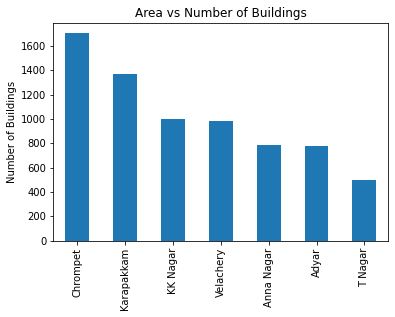

In [7]:
df['AREA'].value_counts().plot.bar()
plt.ylabel('Number of Buildings')
plt.title('Area vs Number of Buildings')

In [8]:
# Interpretation of the above plot.
#   we have plotted the bar plot for the frequency of values under each name.
#   we see that the T Nagar has the lowest frequency and the chrompet
#   has the highest frequency that is the houses sold as per the data.

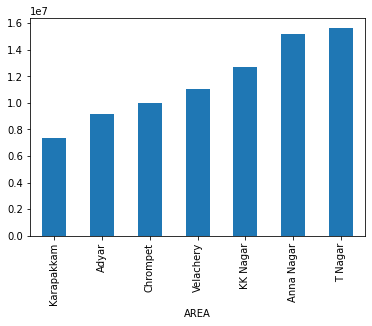

In [9]:
df.groupby(['AREA'])['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [10]:
# Interpretation of the above plot.
    # we have plotted a bar char with value sorted ascending, comparing 
    # to sales price and we have understood that the T nagar pricing is very high,
    # though the houses sold is less. 
    # Chrompet sales is in the lead with a moderate sales price 
    # intresting fact is that the Adyar houses pricing are less and yet the sales is least.
    # we also see a linear relationship, sales wise in the data, so we will be lable encoding to retain the order.

In [11]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [12]:
Area = {'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6}

In [13]:
df['AREA'] = df['AREA'].map(Area, df['AREA'])
df.AREA.head()

0    0
1    5
2    1
3    3
4    0
Name: AREA, dtype: int64

# Fearure "INT_SQFT"

In [14]:
df.INT_SQFT.isnull().sum()

0

In [15]:
df['INT_SQFT'].dtype

dtype('int64')

In [16]:
df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

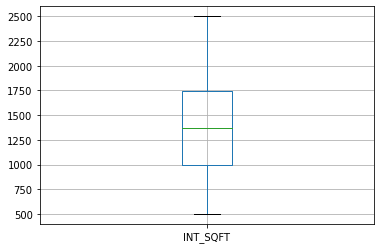

In [17]:
df.boxplot(column = 'INT_SQFT')

In [18]:
# no outliers in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4b52a67d0>]],
      dtype=object)

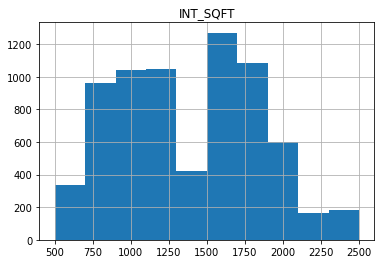

In [19]:
df.hist(column = ['INT_SQFT'])

In [20]:
# we see a normal bell shaped curve.
# this shows that the most of the houses in the data are 1300 sqft at an average.

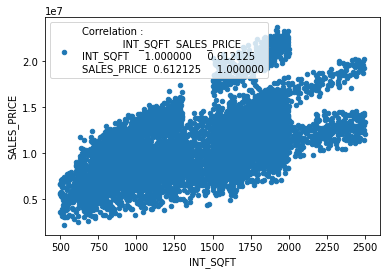

In [21]:
lab = df[['INT_SQFT', 'SALES_PRICE']].corr()
df.plot.scatter('INT_SQFT', 'SALES_PRICE',label = f'Correlation : \n{lab}')

In [22]:
# by the plot its clear that there is a linear relationship in the data its a moderate though(0.61).
# its obvious that for an increasing sqft size, there will be increase in the prize

# Fearure "DATE_SALE"

In [23]:
df.DATE_SALE.dtype

dtype('O')

In [24]:
df.DATE_SALE.isnull().sum()

0

In [25]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)
df.DATE_SALE.dtype

dtype('<M8[ns]')

In [26]:
df['Sale Year'] = pd.DatetimeIndex(df.DATE_SALE).year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   int64         
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   object        
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

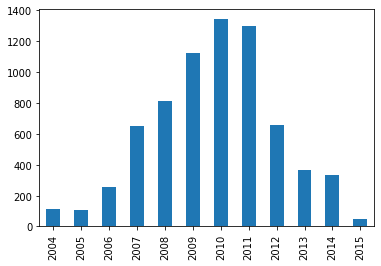

In [27]:
df['Sale Year'].value_counts().sort_index(ascending=True).plot.bar()

In [28]:
# Interpretation of the above plot
# we can see that the the 2015 sales has droped drastically and also the best sales was on 2010 for the houses.
# the data is normally distributed among the years though.

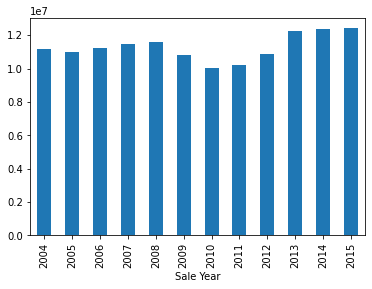

In [29]:
df.groupby(['Sale Year'])['SALES_PRICE'].mean().plot.bar()

In [30]:
# we can see the relation ship is uniform among all the years not much difference in the prices
# eventhough the price did not have a big change we can use it to find the age.

Text(0.5, 1.0, 'Month vise Sales')

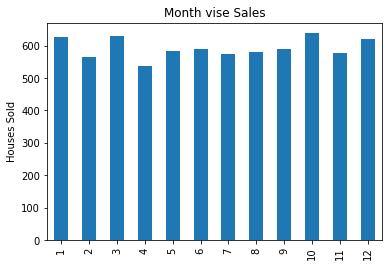

In [31]:
df['DATE_SALE'].dt.month.value_counts().sort_index(ascending=True).plot.bar()
plt.ylabel('Houses Sold')
plt.title('Month vise Sales')

In [32]:
# we see here the data in months.
# this explains the peak sale months were (1,3,10,12)
# start and the end of the year had more sale but not big difference though.

In [33]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Fearure "DIST_MAINROAD"

In [34]:
df.DIST_MAINROAD.isnull().sum()

0

In [35]:
df.DIST_MAINROAD.dtype

dtype('int64')

In [36]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

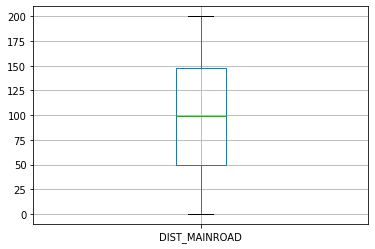

In [37]:
df.boxplot(column='DIST_MAINROAD')

In [38]:
# its clear there is no outliers
# the median of the distance is 100 as the boxplot indicates.

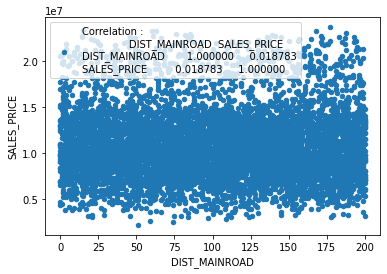

In [39]:
lab = df[['DIST_MAINROAD', 'SALES_PRICE']].corr()
df.plot.scatter(x='DIST_MAINROAD',y='SALES_PRICE',label = f'Correlation : \n{lab}')

In [40]:
# on the relationship plot we can understand that there is not much difference in the prices.
# and the corr is 0.01 so we are droping this feature

In [41]:
df.drop('DIST_MAINROAD',axis =1, inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Feature 'N_BEDROOM'

In [42]:
df.N_BEDROOM.isnull().sum()

1

In [43]:
df.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

In [44]:
df['N_BEDROOM'].fillna(df.N_BEDROOM.mode()[0], inplace =True)
df.N_BEDROOM.isnull().sum()

0

In [45]:
df.N_BEDROOM.astype(int)

0       1
1       2
2       1
3       3
4       1
       ..
7104    1
7105    3
7106    2
7107    1
7108    3
Name: N_BEDROOM, Length: 7109, dtype: int64

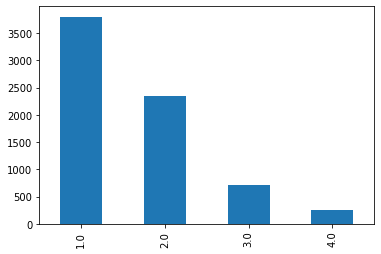

In [46]:
df['N_BEDROOM'].value_counts().plot.bar()

In [47]:
# the data is right Skewed and we can clearly see the rooms that have 1 bed room is more.

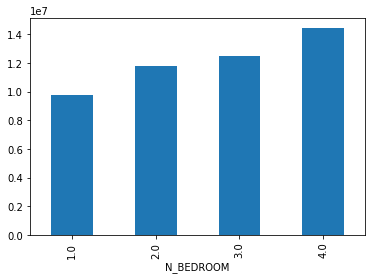

In [48]:
df.groupby('N_BEDROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [49]:
# its clear there is a linear relationship.
# the obvious thing is, as the rooms increase there will be increase in the price.

In [50]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Feature 'N_BATHROOM'

In [51]:
df.N_BATHROOM.isnull().sum()

5

In [52]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace = True)
df['N_BATHROOM'].unique()

array([1., 2.])

In [53]:
df.N_BATHROOM.astype(int)

0       1
1       1
2       1
3       2
4       1
       ..
7104    1
7105    2
7106    1
7107    1
7108    2
Name: N_BATHROOM, Length: 7109, dtype: int64

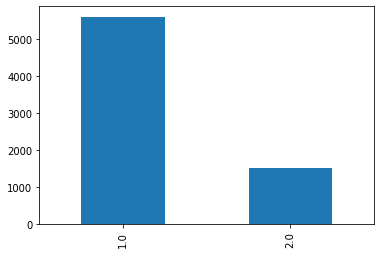

In [54]:
df.N_BATHROOM.value_counts().plot.bar()

In [55]:
# as we see that the most of the houses have one bath room.
# we still see 30% of the houses having 2 bathrooms which is intresting. 

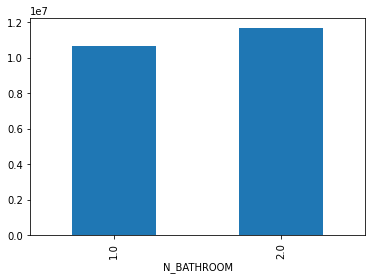

In [56]:
df.groupby('N_BATHROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [57]:
# as we see the relationship is in order.
# when the bathrooms increase the price also increases.
# we are not encoding as the data is already numeric and in order

# Feature N_ROOM

In [58]:
df.N_ROOM.isnull().sum()

0

In [59]:
print(df.N_ROOM.dtype)
print(df.N_ROOM.unique())

int64
[3 5 4 2 6]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


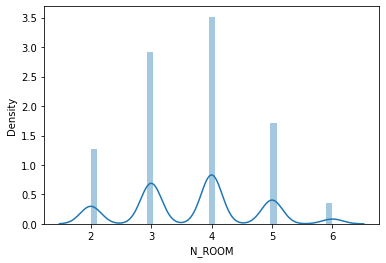

In [60]:
import seaborn as sns 
sns.distplot(df['N_ROOM'])

In [61]:
# the dist is kind of normal but we can see that the 4 rooms houses are the most in the data.
# we can eventually suspect if the rooms are inclusive of bathrooms too.

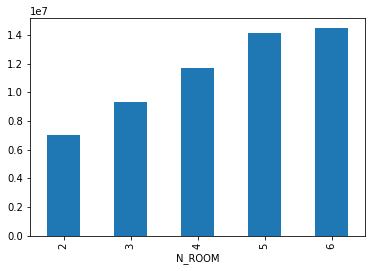

In [62]:
df.groupby('N_ROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [63]:
# as we saw earlier as the rooms increase the price has increased.
# since the order is already maintaind no encoding required.
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Feature 'SALE_COND'

In [64]:
df.SALE_COND.isnull().sum()


0

In [65]:
print(df['SALE_COND'].dtype)
df['SALE_COND'].unique()

object


array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [66]:
ctype = {'AbNormal': 'Abnormal', 'Family':'Family', 'Partial':'Partial', 'AdjLand':'Adjland', 'Normal Sale':'Normal', 'Ab Normal':'Abnormal', 'Partiall':'Partial', 'Adj Land':'Adjland', 'PartiaLl':'Partial'}

df['SALE_COND'] = df['SALE_COND'].map(ctype,df['SALE_COND'])
df['SALE_COND'].unique()

array(['Abnormal', 'Family', 'Partial', 'Adjland', 'Normal'], dtype=object)

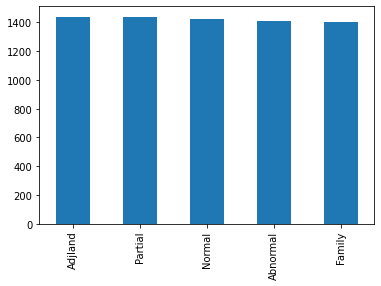

In [67]:
df.SALE_COND.value_counts().plot.bar()

In [68]:
# We can see an uniformly distributed data, for all the type of house.
# the interpretation would be that the sale has happened nomatter what type of house sale it is.

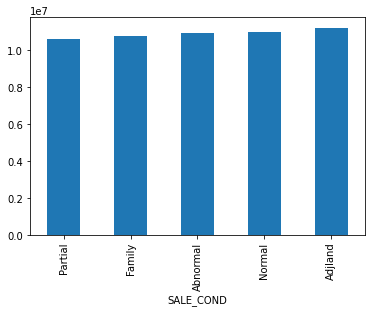

In [69]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [70]:
df.SALE_COND.unique()

array(['Abnormal', 'Family', 'Partial', 'Adjland', 'Normal'], dtype=object)

In [71]:
# we are retaining the feature as we see a linear relationship.
# Label Encoding....
cmap = {'Abnormal':2, 'Family':1, 'Partial':0, 'Adjland':4, 'Normal':3}
df.SALE_COND.replace(cmap,inplace=True)

# Feature 'PARK_FACIL'

In [72]:
df.PARK_FACIL.isnull().sum()

0

In [73]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [74]:
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes': 1, 'No': 0, 'Noo':0},df['PARK_FACIL'])

In [75]:
df['PARK_FACIL'].dtype

dtype('int64')

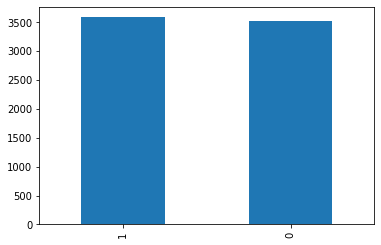

In [76]:
df.PARK_FACIL.value_counts().plot.bar()

In [77]:
# from the above plot we can intrepret that we have equal ammount of data for the house sold with parking and without parking.
# we definately see no Skew in the data.

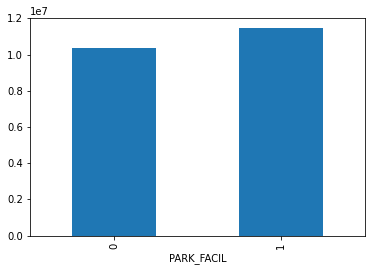

In [78]:
df.groupby('PARK_FACIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [79]:
# it has a very slight relationship with the price.
# house with parking fesility has given a little bit of price increase.
# Since we still have some relationship we Retain this column.
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Feature 'DATE_BUILD

In [80]:
df.DATE_BUILD.isnull().sum()

0

In [81]:
df.DATE_BUILD.dtype

dtype('O')

In [82]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
df['Built Year'] = pd.DatetimeIndex(df.DATE_BUILD).year
df.DATE_BUILD.dtype

dtype('<M8[ns]')

In [83]:
df['AGE'] = df['Sale Year'] - df['Built Year']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


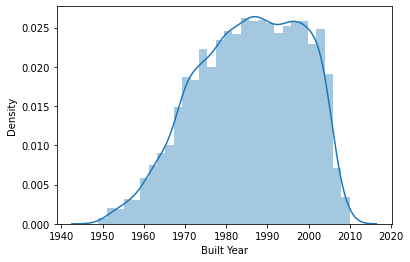

In [84]:
sns.distplot(df['Built Year'])

In [85]:
# from the above plot we can see that the houses are buit mostly before the year 2000.
# most of the houses are from 1985.
# though it looks like normal dist, it has a bit of left skew.

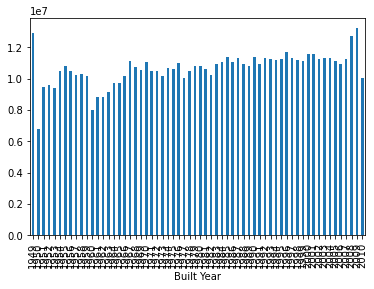

In [86]:
df.groupby('Built Year')['SALES_PRICE'].mean().sort_index(ascending=True).plot(kind='bar')

In [87]:
# we see randomness in the both built and the sold year.
# there is not a verygood relationship to the price so we are droping both the columns.
df.drop('Built Year',axis=1,inplace = True)
df.drop('Sale Year',axis=1,inplace = True)
df.drop('DATE_SALE',axis=1,inplace = True)
df.drop('DATE_BUILD',axis=1,inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'AGE'],
      dtype='object')

# Feature 'BUILDTYPE'

In [88]:
df['BUILDTYPE'].isnull().sum()

0

In [89]:
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [90]:
typeh = {'Commercial':'Commercial', 'Others':'Others', 'Other':'Others', 'House':'House', 'Comercial':'Commercial'}
df['BUILDTYPE'] = df['BUILDTYPE'].replace(typeh)
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

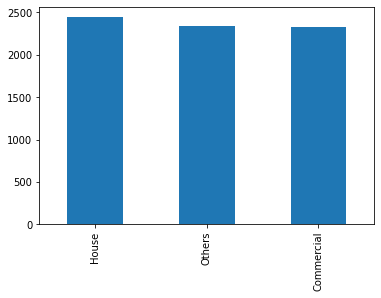

In [91]:
df.BUILDTYPE.value_counts().plot.bar()

In [92]:
# we see that the data is evenly distributed among all three types.
# so all the type of house has been evenly sold in the data.

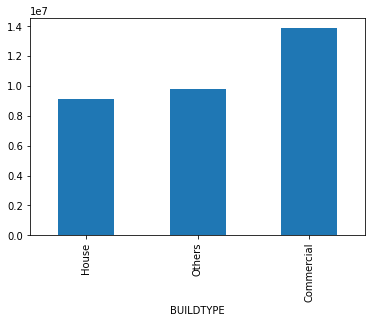

In [93]:
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [94]:
# There is a pure relationship between price and the type of the building.
# The relationship is definately not a linear, so we are one hot encoding it.
# the commercial houses obviously has a high price.

In [95]:
df = pd.get_dummies(df,columns=['BUILDTYPE'])

In [96]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

# Feature 'UTILITY_AVAIL'

In [97]:
df['UTILITY_AVAIL'].isnull().sum()

0

In [98]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [99]:
m = {'AllPub':'AllPub' , 'ELO':'ELO', 'NoSewr ':'NoSewr', 'NoSeWa':'NoSeWa', 'All Pub':'AllPub'}
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace(m)

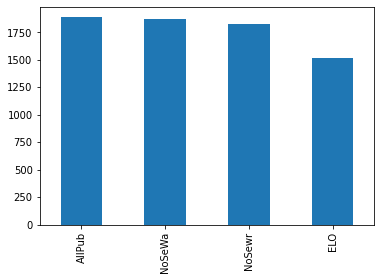

In [100]:
df.UTILITY_AVAIL.value_counts().plot.bar()

In [101]:
# the houses with Elo fesility are a sold a bit less.

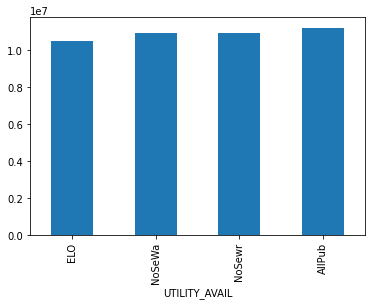

In [102]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [103]:
# we see an mostly even price among all the classes.
# still we see a rising patern and a linear relationship.
# label encoding...
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [104]:
avmap = {'AllPub':3, 'ELO':0, 'NoSewr':2, 'NoSeWa':2}
df.UTILITY_AVAIL.replace(avmap,inplace=True)

# Feature 'STREET'

In [105]:
df['STREET'].isnull().sum()

0

In [106]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [107]:
sttype = {'Paved':'Paved', 'Gravel':'Gravel', 'No Access':'No Access', 'Pavd':'Paved', 'NoAccess':'No Access'}
df['STREET'].replace(sttype,inplace=True)

In [108]:
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

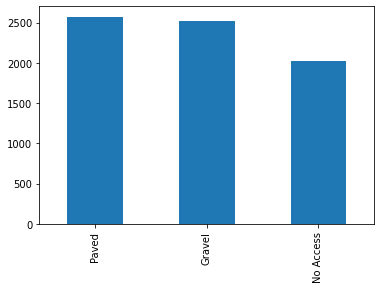

In [109]:
df.STREET.value_counts().plot.bar()

In [110]:
# the data of the No Access is a bit less in the data compared to other features.

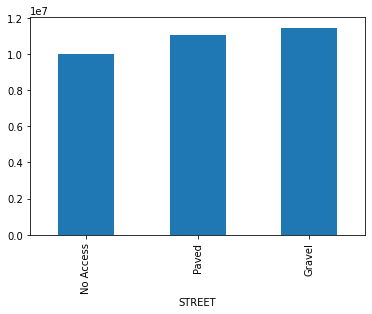

In [111]:
df.groupby('STREET')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [112]:
# we see a linear relationship here so we will lable encode 
# and retain the order.
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [113]:
stmap = {'Paved':1, 'Gravel':2, 'No Access':0}
df.STREET.replace(stmap,inplace=True)

In [114]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

# Feature 'MZZONE'

In [115]:
df['MZZONE'].isnull().sum()

0

In [116]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

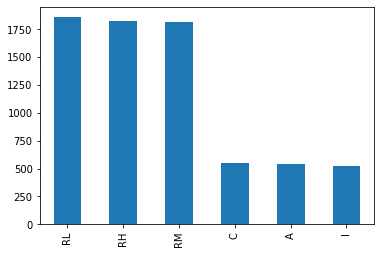

In [117]:
df.MZZONE.value_counts().plot.bar()

In [118]:
# as per the data we have more data of the residential High, low and medium density landdata.
# it is a right skewed data.

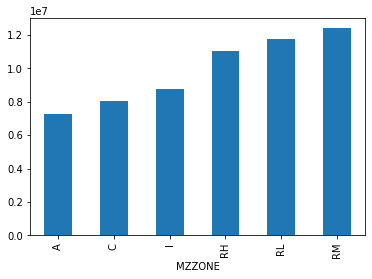

In [119]:
df.groupby('MZZONE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [120]:
# we definately see a linear Relationship in the Data.
# Agri lands are low priced residential medium are very high priced.
# we see a linear relationship so we will be label encoding.
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [121]:
amap = {'A':0, 'RH':3, 'RL':4, 'I':2, 'C':1, 'RM':5}
df.MZZONE.replace(amap,inplace=True)

In [122]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

Feature QS_ROOMS

In [123]:
df.QS_ROOMS.isnull().sum()

0

In [124]:
df.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


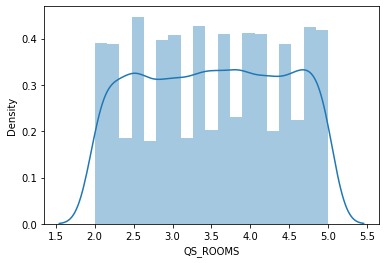

In [125]:
sns.distplot(df['QS_ROOMS'])

In [126]:
# we can see the data is uniformly distributed.
# the dataset has equal ammount of data for all class ratings.

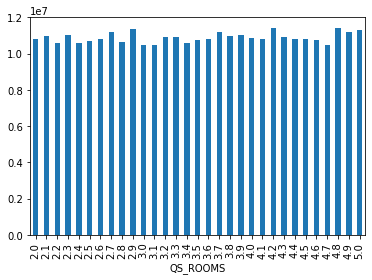

In [127]:
df.groupby('QS_ROOMS')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [128]:
# our unique values already has a rating order so we are to sort the index.
# as per our index we dont see any linear relationship and we are droping the feature.
df.drop(columns=['QS_ROOMS'],inplace=True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

Feature 'QS_BATHROOM'

In [129]:
df['QS_BATHROOM'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


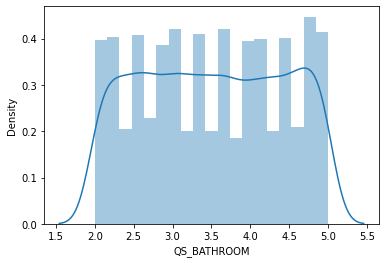

In [130]:
sns.distplot(df['QS_BATHROOM'])

In [131]:
# again the data we see is uniform.
# we dont have too much of any data.

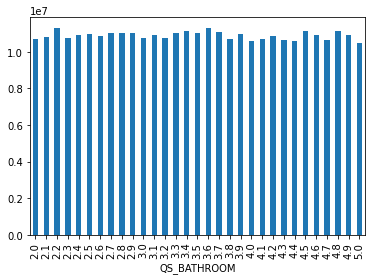

In [132]:
df.groupby('QS_BATHROOM')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [133]:
# no relationship in terms of price.
df.drop(columns=['QS_BATHROOM'],inplace=True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

Feature QS_BEDROOM

In [134]:
df.QS_BEDROOM.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


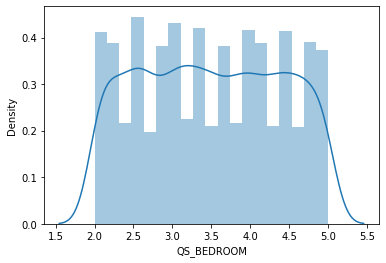

In [135]:
sns.distplot(df['QS_BEDROOM'])

In [136]:
# Uniform.....

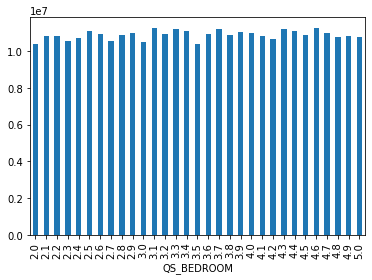

In [137]:
df.groupby('QS_BEDROOM')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [138]:
# no relationship.
df.drop(columns= ['QS_BEDROOM'],inplace = True)

Feature QS_OVERALL

In [139]:
df.QS_OVERALL.isnull().sum()

48

In [140]:
df.QS_OVERALL.fillna(df.QS_OVERALL.mode(),inplace=True)

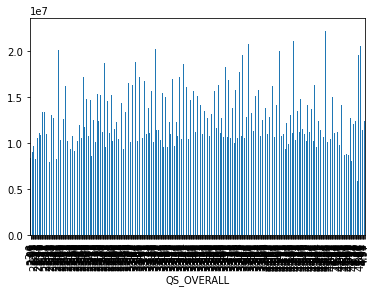

In [141]:
df.groupby('QS_OVERALL')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [142]:
# Drop
df.drop(columns = ['QS_OVERALL'], inplace=True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [143]:
# we will drop REG_FEE and commis as our target is fixed as sales price.
# if we need to use them we will have to add them up with sales and it is a 
# restart of all the progress and also will not make much difference.
df.drop(columns=['REG_FEE','COMMIS'],inplace=True) 
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

# Target 'SALES_PRICE'

In [144]:
df.SALES_PRICE.isnull().sum()

0

In [145]:
df.SALES_PRICE.dtype

dtype('int64')

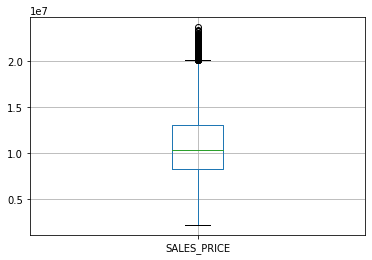

In [146]:
df.boxplot(column=['SALES_PRICE'])

In [147]:
# we see outliers but its regarding the over priced houses.
# this data will definately make sense when it comes to the relationship with other 
# columns and also the we can identify the factors that has influenced the sales price.
# here the outliers are necessary and not required to be deleted.
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

# Feature 'AGE'

In [148]:
df.AGE.isnull().sum()

0

In [149]:
df.AGE.dtype

dtype('int64')

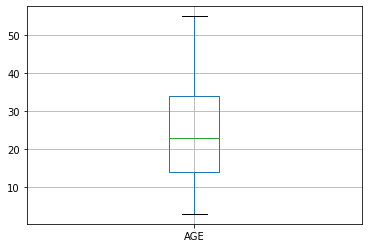

In [150]:
df.boxplot(column = ['AGE'])

In [151]:
# we see no outliers
# the data is good to go. the intreasiting point is that,
# the median age stands arround 23-25 while the max is still arround 55-60
# normal distribution overall

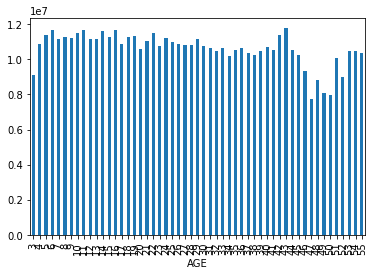

In [152]:
df.groupby('AGE')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [153]:
# there is an inverse relationship, it has ups and downs
# but we can see the linear pattern .
# we also see 43 years old house with a very high price
# which explains the other features are more influensive also.
# we will try to transform the data.

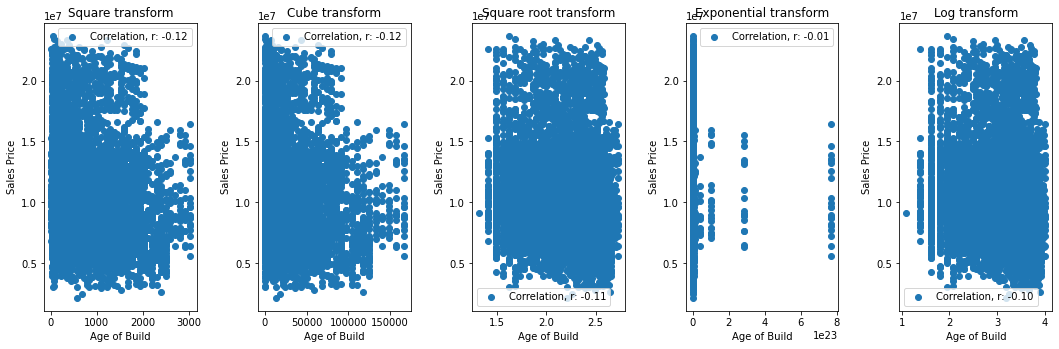

In [154]:
def plot():
  r = df[['Transformed', 'SALES_PRICE']].corr()
  r = float(r['SALES_PRICE'][0])
  plt.scatter(df['Transformed'], df['SALES_PRICE'], label = 'Correlation, r: {:.2f}'.format(r))
  plt.xlabel('Age of Build')
  plt.ylabel('Sales Price')
  plt.legend()
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

j = 0
plt.figure(figsize = (17.5,5))

for i in range(5):
  plt.subplot(1,5,j+1)
  if i== 0:
    df['Transformed'] = np.square(df['AGE'])
    plt.title('Square transform')
    plot()
  elif i ==1 :
    df['Transformed'] = np.power(df['AGE'], 3)
    plt.title('Cube transform')
    plot()
  elif i == 2:
    df['Transformed'] = np.power(df['AGE'], 0.25)
    plt.title('Square root transform')
    plot()
  elif i == 3:
    df['Transformed'] = np.exp(df['AGE'])
    plt.title('Exponential transform')
    plot()
  else:
    df['Transformed'] = np.log(df['AGE'])
    plt.title('Log transform')
    plot()
  j+=1

In [155]:
# since no corelation is has good relationship we are droping this feature.
df.drop(columns='AGE',inplace=True)
del df['Transformed']

In [156]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1.0,1.0,3,2,1,3,1,0,7600000,1,0,0
1,5,1986,2.0,1.0,5,2,0,3,2,3,21717770,1,0,0
2,1,909,1.0,1.0,3,2,1,0,2,4,13159200,1,0,0
3,3,1855,3.0,2.0,5,1,0,2,1,2,9630290,0,0,1
4,0,1226,1.0,1.0,3,2,1,3,2,1,7406250,0,0,1


# Multicolinearity

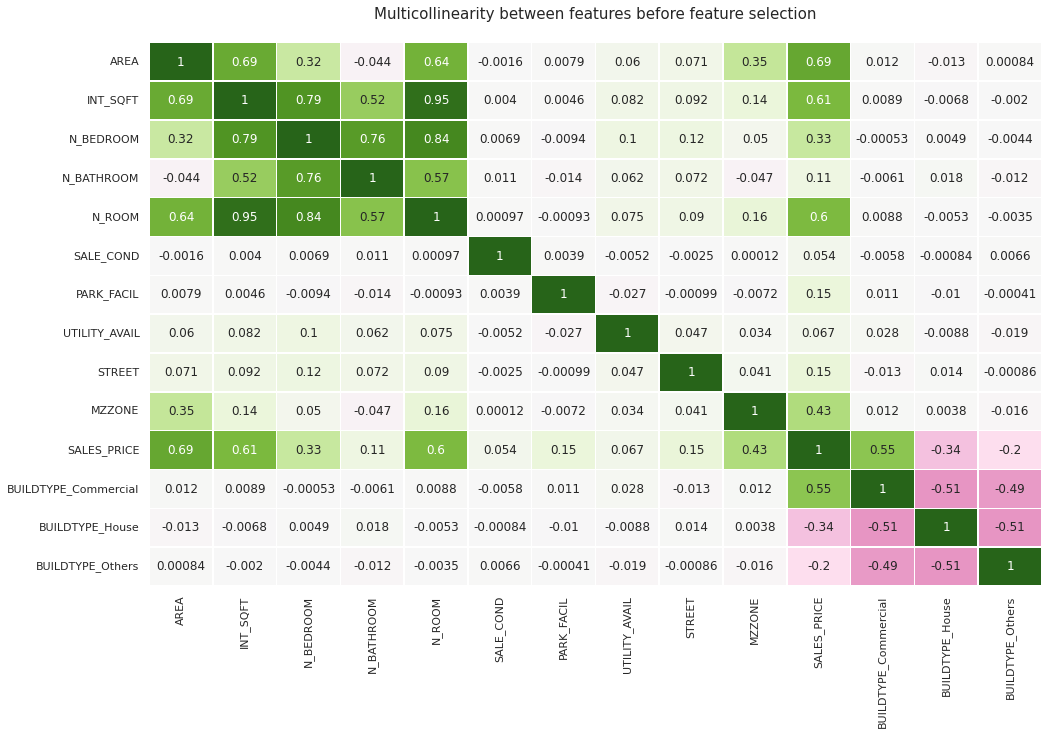

In [157]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.title('Multicollinearity between features before feature selection\n', fontsize = 15)
plt.show()

In [158]:
# in the Multicolinearity we see that the 'Nrooms' has huge relation with int_sqft.
# int_sqft is of 0.95 which will obslutely disturb the model.
# we will also be useing the feature importance in the feature to find best feature,
# so these might disturb, we are droping this feature...
del df['N_ROOM']

# Splitting the Data.

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [160]:
x = df.drop(columns=['SALES_PRICE'])
y = df['SALES_PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
x_train.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
4371,0,1275,1.0,1.0,4,0,2,1,0,1,0,0
6908,2,1117,1.0,1.0,0,1,3,1,5,0,1,0
804,0,1463,2.0,2.0,3,1,2,2,1,0,0,1
3831,1,1215,2.0,2.0,2,1,2,2,5,1,0,0
1722,5,1782,1.0,1.0,2,1,2,1,5,0,0,1


# Linear regression

In [161]:
from sklearn import linear_model
features = list(df.columns)
features.remove('SALES_PRICE')

In [162]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: 1540509.6109045185
coefficients: [  717452.52455266     3693.16358584  -919360.43970301   473885.27174982
   149826.90097415  1024869.34683147     9466.01974551   476413.08517964
   615908.74947231  2885173.74621466 -1790632.69300714 -1094541.05320752]


## Feature Importances

In [163]:
import itertools

combinations = []
for x in range(1,20): 
    combinations.append(itertools.combinations(df[features], x))

best_score = 0
bestfeatures = []
for item in combinations:
    for group in item:
        group = list(group)
        x = df[group]
        linreg = linear_model.LinearRegression()
        linreg.fit(x, y)
        score = linreg.score(x, y)
        if score > best_score:
          best_score = score
          bestfeatures = x.columns

In [164]:
print('R2 =',best_score.round(2),'\n')
print('Best combination Features are...\n')
for i in range(len(bestfeatures)):
  print(i+1,' ',bestfeatures[i])

R2 = 0.91 

Best combination Features are...

1   AREA
2   INT_SQFT
3   N_BEDROOM
4   N_BATHROOM
5   SALE_COND
6   PARK_FACIL
7   UTILITY_AVAIL
8   STREET
9   MZZONE
10   BUILDTYPE_Commercial
11   BUILDTYPE_House


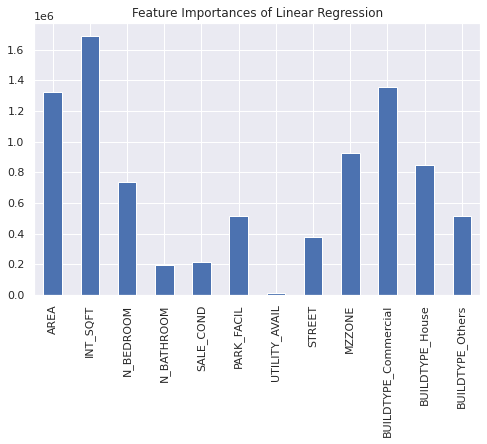

In [165]:
# feature importance by score.
# ( coeffecient * standard deviation(coeffecient) ) will generally give us the result.

imp_y = x.columns
imp_x = linreg.coef_
impdf = pd.DataFrame(imp_x,imp_y,columns=['Coefficients'])
impdf['Coefficients'] = impdf['Coefficients'].abs()
stdev = []
for i in x.columns:
  stdev.append(df[i].std())
impdf['std'] = np.array(stdev).reshape(-1,1)
impdf['importance'] = impdf['Coefficients'] * impdf['std']
plt.figure(figsize = (8,5))
impdf['importance'].plot.bar() 
plt.title('Feature Importances of Linear Regression')
plt.savefig('Feature Importances Linear Regression.jpg', dpi = 400)

In [166]:
# so based on feature importances we see int sqft is the highest and lowest is utility avil.

# KNN Model Building

In [167]:
# scaling and spliting.
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['SALES_PRICE'])
y = df['SALES_PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
x_train.head()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [168]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

score = -70
l = 0
for i in range(1,20): # best K_value
  for j in range(4,10): # best CV_fold
    knn = KNeighborsRegressor(i)
    knn.fit(x_train,y_train)
    s = np.mean(cross_val_score(knn, x_train, y_train, cv=j)) # mean cv_score
    t = knn.score(x_train,y_train)
    if s > score and t > s: # condition to block overfit.
      score = s
      l = i
      c = j     

In [169]:
print('The best score obtained = ',score.round(2))
print('The best Nearest Neighbors =',l,'\nThe best cross validation fold =',c)

The best score obtained =  0.94
The best Nearest Neighbors = 4 
The best cross validation fold = 9


In [170]:
# the if condition, tunes the paramaters to be non overfitting.
# the best scores are as stated above.
# 2 for loops are to find the k values and the best cv.

# Decision Tree Model Building.

In [171]:
# scaling and spliting.
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['SALES_PRICE'])
y = df['SALES_PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
x_train.head()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [172]:
from sklearn.tree import DecisionTreeRegressor

score = -80
l = 0
for i in range(1,20):
  for j in range(4,10):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(x_train, y_train)
    s = np.mean(cross_val_score(dt, x_train, y_train, cv=j)) # mean cv_score
    t = dt.score(x_train,y_train)
    if s > score and t > s:# condition to block overfit.
      score = s
      l = i
      c = j

In [173]:
print('The best score obtained = ',score.round(2))
print('The best depth =',l,'\nThe best cross validation fold =',c)

The best score obtained =  0.97
The best depth = 19 
The best cross validation fold = 8


In [174]:
dt = DecisionTreeRegressor(max_depth=l)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=19)

In [175]:
fimp = dt.feature_importances_.round(3)
fimp.tolist()
Fea = df.columns[:-1].tolist()
val = {
    'Feature' : Fea,
    'Importances' : fimp
}

Feature = pd.DataFrame(val).sort_values(by='Importances', ascending = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


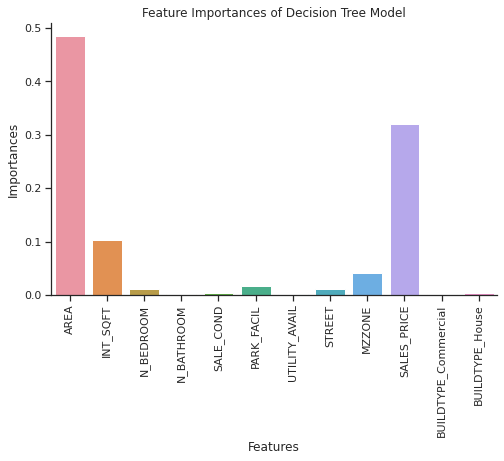

In [176]:
plt.figure(figsize = (8,5))
sns.set(style = 'ticks')
sns.barplot([df.columns[x] for x in range(len(fimp))], fimp)
plt.title('Feature Importances of Decision Tree Model')
plt.ylabel('Importances')
plt.xlabel('Features')
plt.xticks(rotation = 90)
sns.despine()
plt.savefig('Feature Importances Decision Tree.jpg', dpi = 400)
plt.show()

# Random Forest Model Building

In [177]:
# scaling and spliting.
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['SALES_PRICE'])
y = df['SALES_PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
x_train.head()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
score=-80
for i in range(1,20):
  rf = RandomForestRegressor(n_estimators= 100, max_depth = i, max_features='sqrt')
  rf.fit(x_train, y_train)
  s = np.mean(cross_val_score(rf, x_train, y_train, cv=9)) # mean cv_score
  t = rf.score(x_train,y_train)
  if s > score and t > s:# condition to block overfit.
    score = s
    l = i

In [179]:
print('The best score obtained = ',score)
print('The best depth =',l)

The best score obtained =  0.9861662105857258
The best depth = 17


In [180]:
fimp = rf.feature_importances_.round(3)
fimp.tolist()
Fea = df.columns[:-1].tolist()

val = {
    'Feature' : Fea,
    'Importances' : fimp
}

Feature = pd.DataFrame(val).sort_values(by='Importances', ascending = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


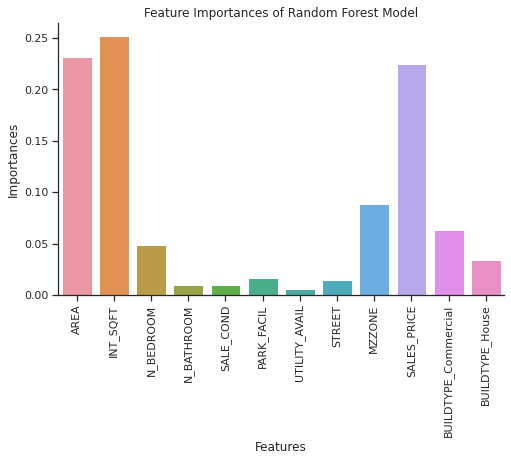

In [181]:
plt.figure(figsize = (8,5))
sns.set(style = 'ticks')
sns.barplot([df.columns[x] for x in range(len(fimp))], fimp)
plt.title('Feature Importances of Random Forest Model')
plt.ylabel('Importances')
plt.xlabel('Features')
plt.xticks(rotation = 90)
sns.despine()
plt.savefig('Feature Importances Random Forest.jpg', dpi = 400)
plt.show()

# XG_Boost

In [182]:
# scaling and spliting.
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['SALES_PRICE'])
y = df['SALES_PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
x_train.head()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [183]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
score = -70
l = 0
for lr in np.arange(0.01, 0.35, 0.01):
  lr = round(lr,2)
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_train,y_train) 
  model.score(x_test, y_test)
  s = np.mean(cross_val_score(model, x_train, y_train, cv=10))
  t = model.score(x_train,y_train)
  if s > score and t > s:
    score = s
    l = lr
print('The best score obtained = ',score)
print('The learning rate =',l)    

The best score obtained =  0.9929445277909285
The learning rate = 0.26


In [184]:
fimp = model.feature_importances_.round(3)
fimp.tolist()
Fea = df.columns[:-1].tolist()

val = {
    'Feature' : Fea,
    'Importances' : fimp
}

Feature = pd.DataFrame(val).sort_values(by='Importances', ascending = False)
Feature

,Feature,Importances
9,SALES_PRICE,0.417
0,AREA,0.275
1,INT_SQFT,0.070
8,MZZONE,0.068
10,BUILDTYPE_Commercial,0.057
5,PARK_FACIL,0.048
2,N_BEDROOM,0.028
7,STREET,0.018
3,N_BATHROOM,0.008
4,SALE_COND,0.007


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


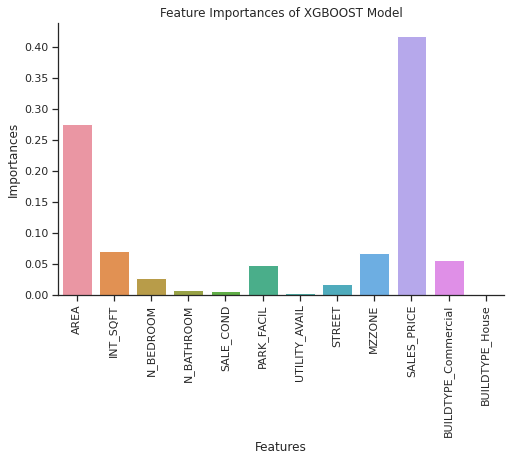

In [185]:
plt.figure(figsize = (8,5))
sns.set(style = 'ticks')
sns.barplot([df.columns[x] for x in range(len(fimp))], fimp)
plt.title('Feature Importances of XGBOOST Model')
plt.ylabel('Importances')
plt.xlabel('Features')
plt.xticks(rotation = 90)
sns.despine()
plt.savefig('Feature Importances XGBoost.jpg', dpi = 400)
plt.show()

# BUSINESS SOLUTIONS

The overall results of all models has been displayed already.
we have seen the results as follows...


*   linear regression model - r2(0.91)- imp features AREA, INT_SQFT, BUILD_TYPE_COMERCIAL.

*   KNN MODEL - CV (0.94)  

*   Decision tree model - CV (0.97) - imp features AREA, INT_SQFT, MZZONE can be taken as top 3 features.

*   Random Forest model - CV (0.986) - imp features AREA, INT_SQFT, MZZONE.

*   XGBOOST was the best - CV (0.992) - this was the closest score and imp features was AREA, INT_SQFT, BUILD_TYPE_COMERCIAL.

since we see not big diff in the importance we will also use the MZZONE and also parking fesility for interpretation as most of the models had these features too as important. 

	Importances
	AREA                	0.233
	INT_SQFT            	0.076
	BUILDTYPE_Commercial	0.068
	PARK_FACIL	          0.059
	MZZONE	              0.059


In [202]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [186]:
Area = {0:'Karapakkam',1:'Adyar',2:'Chrompet',3:'Velachery',4:'KK Nagar',5:'Anna Nagar',6:'T Nagar'}
df['AREA'] = df['AREA'].map(Area, df['AREA'])

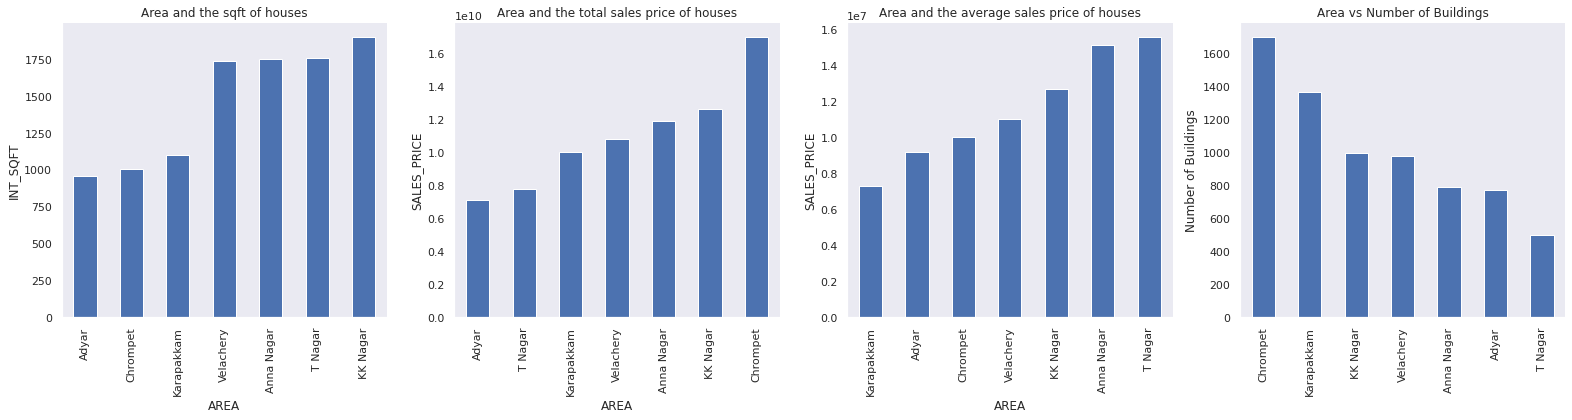

In [257]:
plt.figure(figsize=(22,6))
plt.subplot(1,4,1)
sns.set(style = 'dark')
plt.title('Area and the sqft of houses')
plt.ylabel('INT_SQFT')
df.groupby(['AREA'])['INT_SQFT'].mean().sort_values(ascending=True).plot.bar()
sns.despine()

plt.subplot(1,4,2)
sns.set(style = 'dark')
plt.title('Area and the total sales price of houses')
plt.ylabel('SALES_PRICE')
df.groupby(['AREA'])['SALES_PRICE'].sum().sort_values(ascending=True).plot.bar()
sns.despine()

plt.subplot(1,4,3)
sns.set(style = 'dark')
plt.title('Area and the average sales price of houses')
plt.ylabel('SALES_PRICE')
df.groupby(['AREA'])['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()
sns.despine()

plt.subplot(1,4,4)
sns.set(style = 'dark')
df['AREA'].value_counts().plot.bar()
plt.ylabel('Number of Buildings')
plt.title('Area vs Number of Buildings')
sns.despine()

plt.tight_layout()
plt.show()

Seller Insights:
  * we see that the sqft are more in the KKnagar. the price is not good enough for the amount of space they are ready to offer.
  * if we are a seller its not the best option to take.
  * T-Nagar can offer us the best since its average price is still high.
we should note that for less sqft we get more price.
  * bulding a house in T nagar is best. but we should also note that the 
frequence is less as per our data, which means not many houses has been sold.
  * in that case if we see chromepet sqft is less and also some houses have sold at very huge prices.

Buyer Insight:
  * for a buyer the are should be more and the price should be less.
  * if we see the graph we can sugest that for a medium buyer we can suggest 
Karampakkam because the area is in squire feet is in the center and the average price of the houses is at the lowest. and in no of houses sold even its in the 
second place.
  * chromepet stands at the first place though interms of sale but karampakkam is the best.


In [284]:
typeh = {'Commercial':'Commercial', 'Others':'Others', 'Other':'Others', 'House':'House', 'Comercial':'Commercial'}
tdf['BUILDTYPE'] = tdf['BUILDTYPE'].replace(typeh)

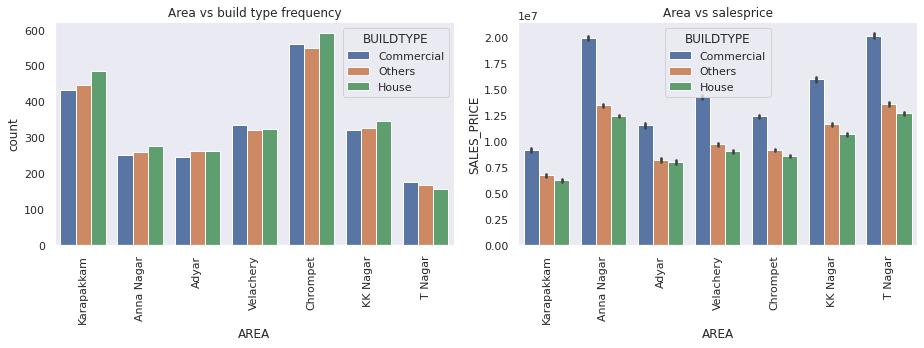

In [305]:
spm = df['SALES_PRICE']
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.set(style = 'dark')
sns.countplot(x=df['AREA'],hue=tdf['BUILDTYPE'])
plt.xticks(rotation= 90)
plt.title('Area vs build type frequency')
sns.despine()

plt.subplot(1,2,2)
sns.set(style = 'dark')
sns.barplot(x = df['AREA'],y = spm, hue=tdf['BUILDTYPE'])
plt.xticks(rotation= 90)
plt.title('Area vs salesprice')
sns.despine()

plt.tight_layout()
plt.show()

* we can clearly see that the comercial houses are priced high and yet people have equally purchased the houses among commercial and other build types.
* one best sugestion is to build commercial couses in chromepet.
we can see that the buyers are also more and the price is also high.
* second option will be the karampakkam as we can see good buying rates.

**As seen earlier Karampakkam have more sqft for less price we must consider that point too**

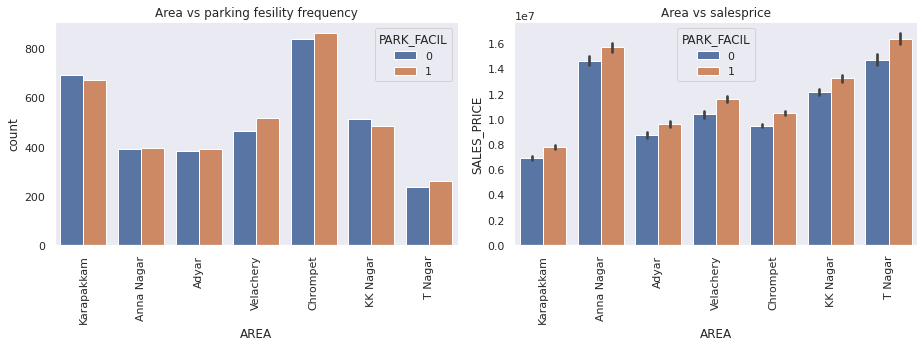

In [312]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.set(style = 'dark')
sns.countplot(x=df['AREA'],hue=df['PARK_FACIL'])
plt.xticks(rotation= 90)
plt.title('Area vs parking fesility frequency')
sns.despine()

plt.subplot(1,2,2)
sns.set(style = 'dark')
sns.barplot(x=df['AREA'], y = df['SALES_PRICE'], hue=df['PARK_FACIL'])
plt.xticks(rotation= 90)
plt.title('Area vs salesprice')
sns.despine()

plt.tight_layout()
plt.show()

* we can see all areas with parking fesility has higher sales price
* yet our sugested place karampakkam has slaes never minding the parking fesility as a problem.
* in other places houses with parking fesility has sold more thatn the non parking ones.
* if chromepet is our option then we must think about it.

In [314]:
amap = {0:'A', 3:'RH', 4:'RL', 2:'I', 1:'C', 5:'RM'}
df.MZZONE.replace(amap,inplace=True)

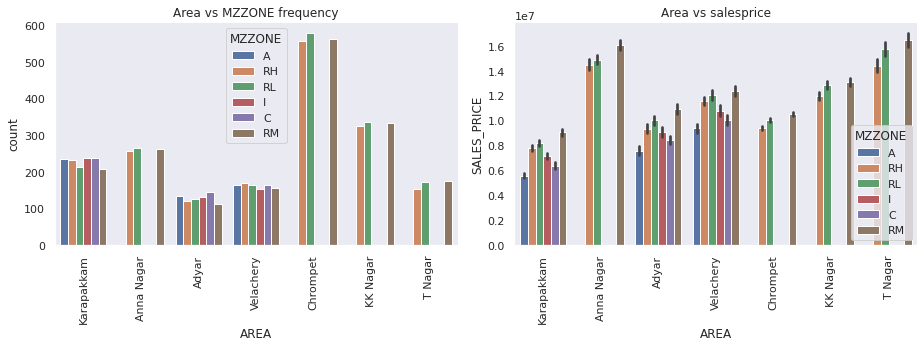

In [315]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.set(style = 'dark')
sns.countplot(x=df['AREA'],hue=df['MZZONE'])
plt.xticks(rotation= 90)
plt.title('Area vs MZZONE frequency')
sns.despine()

plt.subplot(1,2,2)
sns.set(style = 'dark')
sns.barplot(x=df['AREA'], y = df['SALES_PRICE'], hue=df['MZZONE'])
plt.xticks(rotation= 90)
plt.title('Area vs salesprice')
sns.despine()

plt.tight_layout()
plt.show()

* we see that karampakkam has mostly evened ammount of all types of lands.
* to be specific residential medium and high density houses are less sold.
* chromepet has most of the houses sold to be residential low density houses.
* price wise in all areas residential medium density houses are highly priced.

In [317]:
df['sqft_intervals'] = pd.cut(df['INT_SQFT'], [500, 1000, 1500, 2000, 2500], labels=['500-1000', '1000-1500', '1500-2000', '2000-2500'])

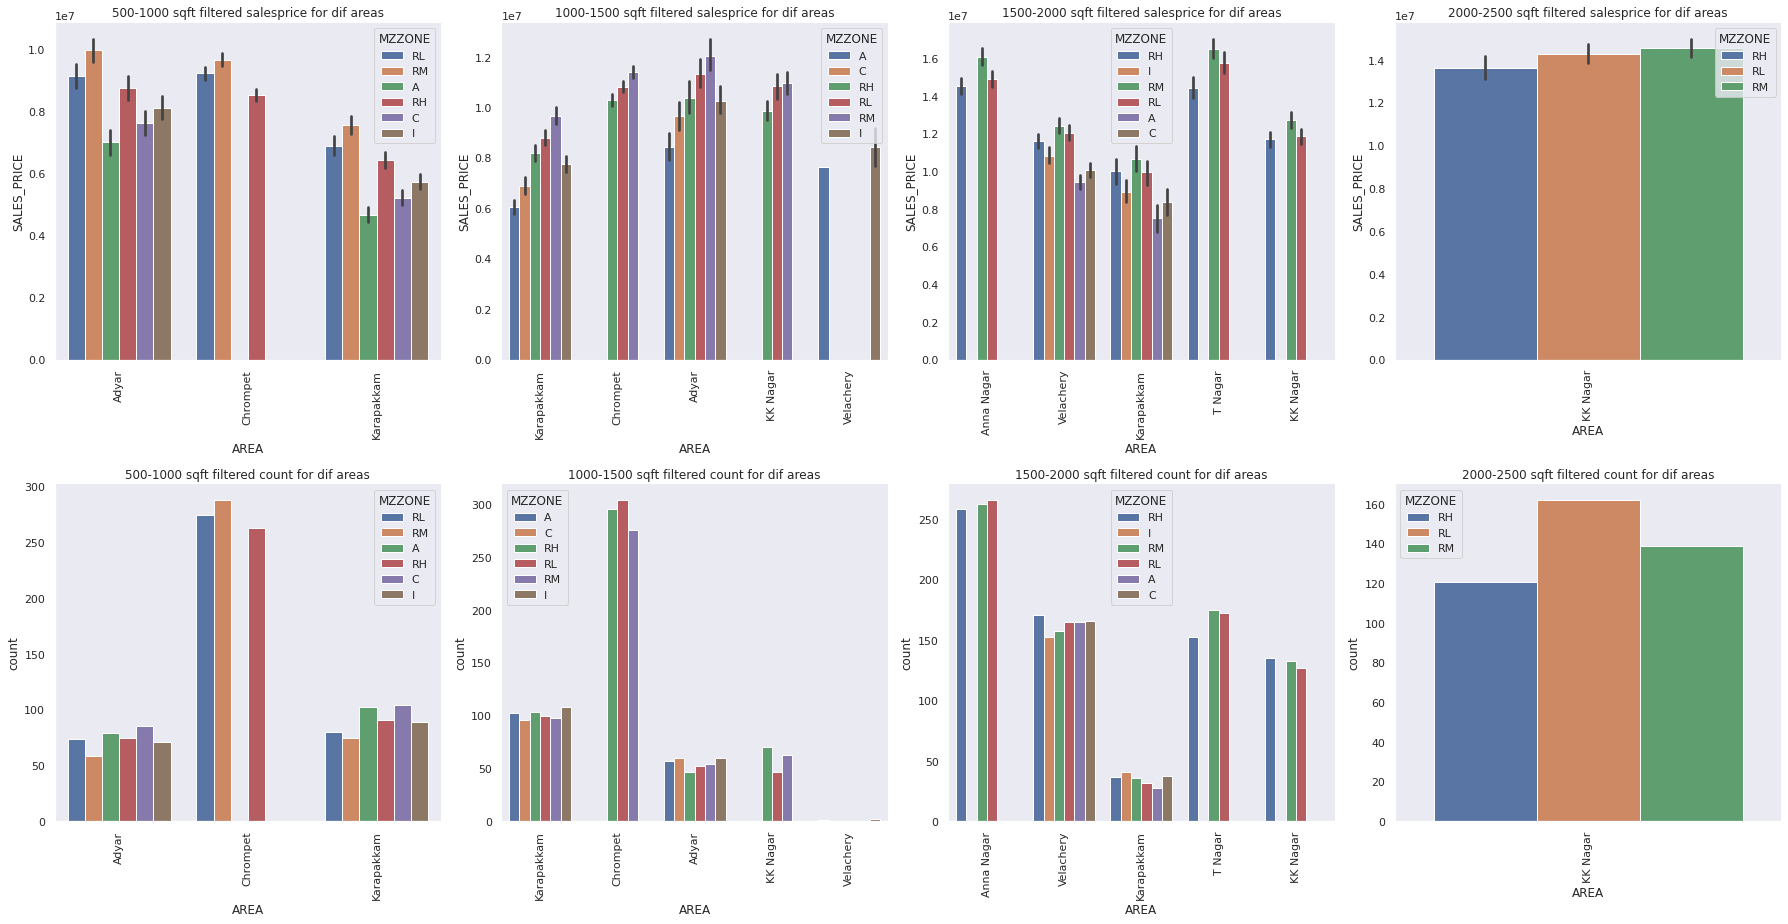

In [332]:
plt.figure(figsize=(25,13))

plt.subplot(2,4,1)
sns.set(style = 'dark')
sns.barplot(x ='AREA' , y = 'SALES_PRICE', hue = 'MZZONE', data = df[df['sqft_intervals']=='500-1000'])
plt.xticks(rotation= 90)
plt.title('500-1000 sqft filtered salesprice for dif areas')
sns.despine()

plt.subplot(2,4,2)
sns.set(style = 'dark')
sns.barplot(x ='AREA' , y = 'SALES_PRICE', hue = 'MZZONE', data = df[df['sqft_intervals']=='1000-1500'])
plt.xticks(rotation= 90)
plt.title('1000-1500 sqft filtered salesprice for dif areas')
sns.despine()

plt.subplot(2,4,3)
sns.set(style = 'dark')
sns.barplot(x ='AREA' , y = 'SALES_PRICE', hue = 'MZZONE', data = df[df['sqft_intervals']=='1500-2000'])
plt.xticks(rotation= 90)
plt.title('1500-2000 sqft filtered salesprice for dif areas')
sns.despine()

plt.subplot(2,4,4)
sns.set(style = 'dark')
sns.barplot(x ='AREA' , y = 'SALES_PRICE', hue = 'MZZONE', data = df[df['sqft_intervals']=='2000-2500'])
plt.xticks(rotation= 90)
plt.title('2000-2500 sqft filtered salesprice for dif areas')
sns.despine()

plt.subplot(2,4,5)
sns.set(style = 'dark')
sns.countplot(x ='AREA' , hue = 'MZZONE', data = df[df['sqft_intervals']=='500-1000'])
plt.xticks(rotation= 90)
plt.title('500-1000 sqft filtered count for dif areas')
sns.despine()

plt.subplot(2,4,6)
sns.set(style = 'dark')
sns.countplot(x ='AREA' , hue = 'MZZONE', data = df[df['sqft_intervals']=='1000-1500'])
plt.xticks(rotation= 90)
plt.title('1000-1500 sqft filtered count for dif areas')
sns.despine()

plt.subplot(2,4,7)
sns.set(style = 'dark')
sns.countplot(x ='AREA' , hue = 'MZZONE', data = df[df['sqft_intervals']=='1500-2000'])
plt.xticks(rotation= 90)
plt.title('1500-2000 sqft filtered count for dif areas')
sns.despine()

plt.subplot(2,4,8)
sns.set(style = 'dark')
sns.countplot(x ='AREA' , hue = 'MZZONE', data = df[df['sqft_intervals']=='2000-2500'])
plt.xticks(rotation= 90)
plt.title('2000-2500 sqft filtered count for dif areas')
sns.despine()

plt.tight_layout()
plt.show()

**first row of plots are sales price and second row are houses sold.**

* sales price for 500-1000 sqft houses. we see adyar has the highest still
count wise chromepet stands tall and our karampakkam is 2nd. 
important point is we dont see other areas in 500 to 1000sqft.
only 3 areas are avilable. which means we cannot make sales if we build such building in other ares.

* 1000-1500 sqft we see chromepet has higher sales.followed by karampakkam and others. price wise KKnagar is second and yet lowest at sales. nopoint in building. velacheri pricing has entered but we see very less count on houses sold. even in this range my best option would be chromepet or karampakkam

* 1500-2000 - this is were we see annanagar, velacheri and Tnagar makeing a lot of contribution were other areas went down. chromepet vanished actully.
even karampakkam is not a best option here.
we see that if sqft is more we can make very good sales in Tnagar(1st), Annanagar(2nd) and velachery(3rd)-for all lands avilability.

* 2000-2500sqft- it only for kknagar no other places has shown sales
and prices are obviously high for residential mediumdensity buildings.

**Conclution :**

we see that based on sqft the prices and sales has shown a lot of changes and meaningfull insights.

overall idea is if we are building houses under 1500 sqft. we see chromepet and karampakkam ruling.

if sqft is above 1500 we can see Tnagar, Annanagar and velachery.

if sqft is above 2000 then its only for kknagar.